Leer Texto de imagenes

In [4]:
import pytesseract
import cv2
import csv
import matplotlib.pyplot as plt
import os

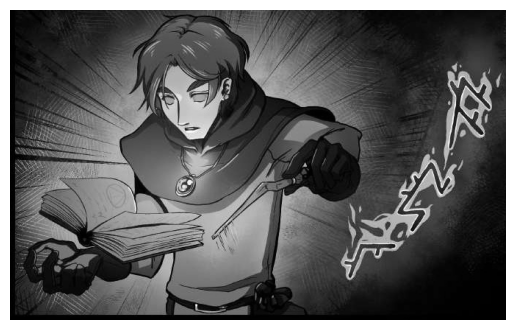

En la imagen panel_1.jpg se ha encontrado: 



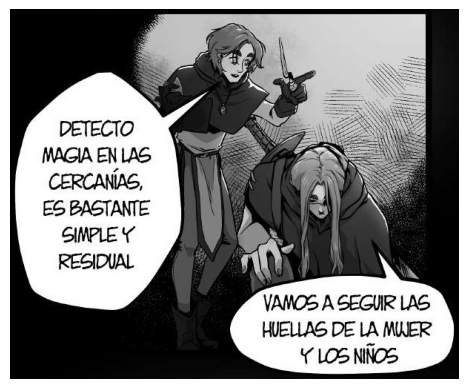

En la imagen panel_2.jpg se ha encontrado: ES BASTANTI E
SIMPLE
RESIDUAL

VAMOS A SEGUR LAS
HIELLAS DE LA MIKER
LOS NOS




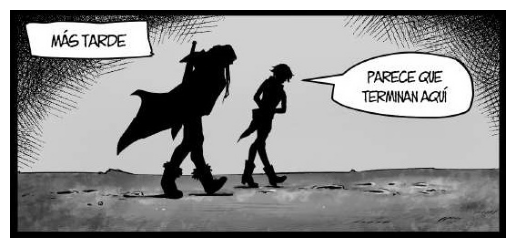

En la imagen panel_3.jpg se ha encontrado: 



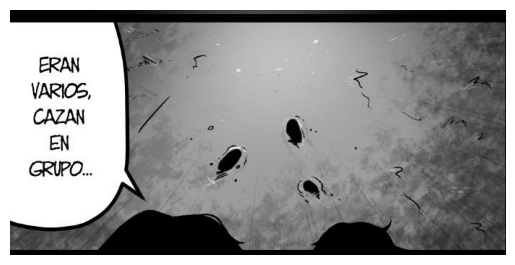

En la imagen panel_4.jpg se ha encontrado: 



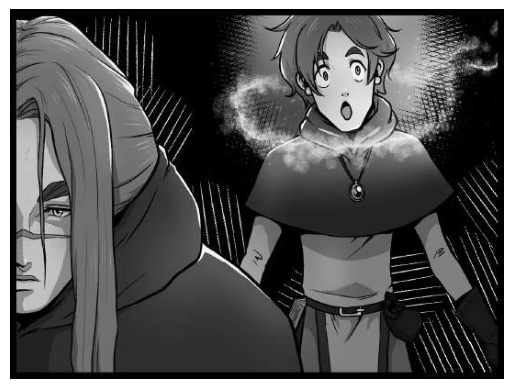

En la imagen panel_5.jpg se ha encontrado: 



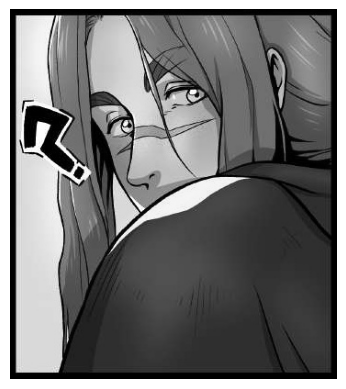

En la imagen panel_6.jpg se ha encontrado: 



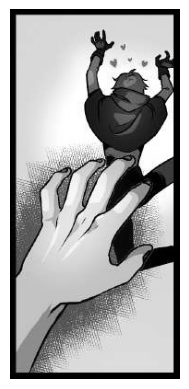

En la imagen panel_7.jpg se ha encontrado: 



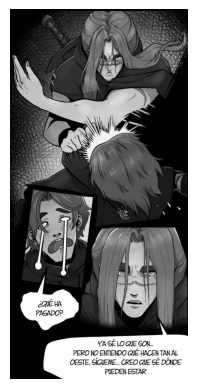

En la imagen panel_8.jpg se ha encontrado: YASE LOGUE SON..
PERO NO ENTIENDO QUE HACEN TAN AL
OESTE, SIGUEME... CREO QUE SE DONDE
PUEDEN ESTAR



Textos reconocidos guardados en data/output/output_text/output_text_tesseract.csv


In [5]:
# Configura Tesseract para reconocimiento de texto en inglés
pytesseract.pytesseract.tesseract_cmd = r'E:\TESSERACT\tesseract.exe'

# Carpeta que contiene las imágenes
folder_path = 'data/output/divide_images/'

# Configura los parámetros de Tesseract para cómics
custom_config = r'--oem 3 --psm 3'

# Lista para almacenar el texto encontrado en cada imagen
all_texts = []

# Itera sobre los archivos en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Asegúrate de que solo se procesen archivos de imagen
        # Carga la imagen
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        '''
        # Preprocesamiento de la imagen
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        unsharp_image = cv2.GaussianBlur(gray_image, (0, 0), 3)
        unsharp_image = cv2.addWeighted(gray_image, 1.5, unsharp_image, -0.5, 0)
        binary_image = cv2.adaptiveThreshold(unsharp_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
        '''
        
        # Realiza el reconocimiento de texto en la imagen preprocesada
        text = pytesseract.image_to_string(gray_image, lang='eng', config=custom_config)
        
        # Guarda el texto encontrado en la lista
        all_texts.append(text)

        # Muestra la imagen
        rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_image)
        plt.axis('off')
        plt.show()

        # Texto que se ha encontrado
        print("En la imagen", filename, "se ha encontrado:", text)
        print()

# Guarda todos los textos reconocidos en un archivo CSV
output_csv = 'data/output/output_text/output_text_tesseract.csv'
with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Image File', 'Text'])
    for filename, text in zip(os.listdir(folder_path), all_texts):
        csv_writer.writerow([filename, text])

print("Textos reconocidos guardados en", output_csv)